<a href="https://colab.research.google.com/github/nupursjsu/Machine-Learning/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Libraries
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#Loading dataset
df = pd.read_csv('/content/drive/My Drive/fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Displaying first few records
df.head()

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [6]:
#Checking missing values in columns
df.isnull().sum()

Unnamed: 0                          0
OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555741
FIRE_NAME                      960479
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE   

In [7]:
#Displaying the shape of data
df.shape

(1880465, 40)

In [0]:
#Creating a new data frame with required columns
new_df = df[['FIRE_YEAR','STAT_CAUSE_DESCR','LATITUDE','LONGITUDE','STATE','DISCOVERY_DATE','FIRE_SIZE']].copy()

In [9]:
#Displaying top 5 records
new_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10


In [10]:
#Converting the DISCOVERY_DATE field's Julian Date format in Gregorian dates
new_df['DATE'] = pd.to_datetime(new_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
new_df.head() #check the data

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28


In [11]:
#Getting some additional data fields such as month and day of the week.
new_df['MONTH'] = pd.DatetimeIndex(new_df['DATE']).month
new_df['DAY_OF_WEEK'] = new_df['DATE'].dt.weekday_name
new_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday


In [0]:
#Applying K-means from scikit learn library on FIRE_SIZE and MONTH column
kmeans = KMeans(n_clusters=4,random_state=0).fit(new_df[['FIRE_SIZE','MONTH']])

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
#Displaying the cluster centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[3.33319700e+01 5.92965533e+00]
 [1.69078254e+05 6.65771812e+00]
 [4.28310032e+04 6.69135802e+00]
 [4.10260896e+05 5.96153846e+00]]


In [0]:
y_means = kmeans.predict(new_df[['FIRE_SIZE','MONTH']])
#plt.scatter(new_df['MONTH'], new_df['FIRE_SIZE'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)

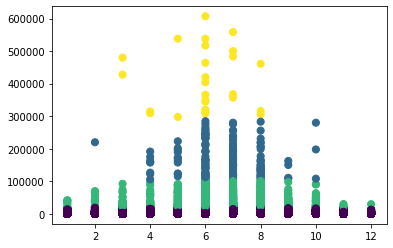

In [16]:
#Plotting the clusters obtained
plt.scatter(new_df['MONTH'],new_df['FIRE_SIZE'], c=y_means, s=50, cmap='viridis')

**In the above k-mean clustering plot we can see the majority of the big fires have happened in the months of June and July.**

In [0]:
kmeans1 = KMeans(n_clusters=4,random_state=0).fit(new_df[['LATITUDE','LONGITUDE']])

In [0]:
y_means1 = kmeans1.predict(new_df[['LATITUDE','LONGITUDE']])

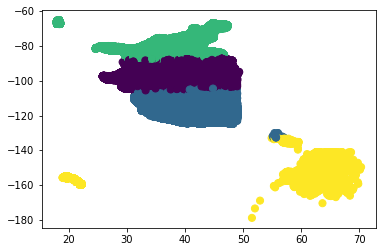

In [19]:
plt.scatter(new_df['LATITUDE'],new_df['LONGITUDE'], c=y_means1, s=50, cmap='viridis')

**In the above clustering plot we can see most of the fires have occurred in longitutes between -100 and -120 which is majorly California region.**

In [0]:
#Applying K-means using tensorflow 2.0
#Importing required libraries
import numpy as np
import tensorflow as tf

In [0]:
#Defining dataframe
new_df = new_df[['FIRE_YEAR', 'FIRE_SIZE']]
def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(new_df, dtype=tf.float32), num_epochs=1)

In [22]:
#Defining number of clusters
num_clusters = 4
kmeans = tf.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi9gd9h0z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f635a954e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
#training the model and printing cluster centers
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Prefer Dataset.range instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi9gd9h0z/model.ckpt.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpi9gd9h0z/model.ckpt.
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calli

In [0]:
#Clustering using Agglomerative clustering in scikit learn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [0]:
X = new_df[['FIRE_YEAR', 'FIRE_SIZE']]

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [0]:
#Applying Single linkage agglomerative clustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_

**System is crashing everytime I try to run Agglomerative Clustering**